<a href="https://colab.research.google.com/github/syaifulaliyup/Prak_Meet5_Komputer_Grafis/blob/main/Prak5_VisualisasiData_G211230083.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('retail_raw_reduced_data_quality.csv')
dataset.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,17/10/2019,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10.0,740000.0
1,1706815,24/10/2019,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2.0,604000.0
2,1710718,03/11/2019,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8.0,1045000.0
3,1683592,19/08/2019,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4.0,205000.0
4,1702573,16/10/2019,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2.0,NaN


In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('retail_raw_reduced_data_quality.csv')
dataset.head()
dataset.tail(10)

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
4990,1678408,02/08/2019,15182,Jakarta Pusat,DKI Jakarta,P1903,BRAND_J,10.0,740000.0
4991,1736503,20/12/2019,18109,Tangerang,Banten,P2866,BRAND_R,3.0,1045000.0
4992,1734787,18/12/2019,18283,Jakarta Selatan,DKI Jakarta,P0734,BRAND_C,2.0,310000.0
4993,1678615,04/08/2019,16880,Bekasi,Jawa Barat,P2426,BRAND_P,3.0,310000.0
4994,1707424,25/10/2019,13021,Yogyakarta,Yogyakarta,P1913,BRAND_J,10.0,740000.0
4995,1724011,01/12/2019,12838,Tangerang,Banten,P3047,BRAND_R,2.0,450000.0
4996,1676302,28/07/2019,13833,Bogor,Jawa Barat,P0760,BRAND_C,3.0,1465000.0
4997,1706071,23/10/2019,16332,Jakarta Timur,DKI Jakarta,P1681,BRAND_H,4.0,747000.0
4998,1703620,17/10/2019,13055,Jakarta Barat,DKI Jakarta,P0757,BRAND_C,8.0,695000.0
4999,1720036,24/11/2019,17609,Jakarta Pusat,DKI Jakarta,P3334,BRAND_S,1.0,1045000.0


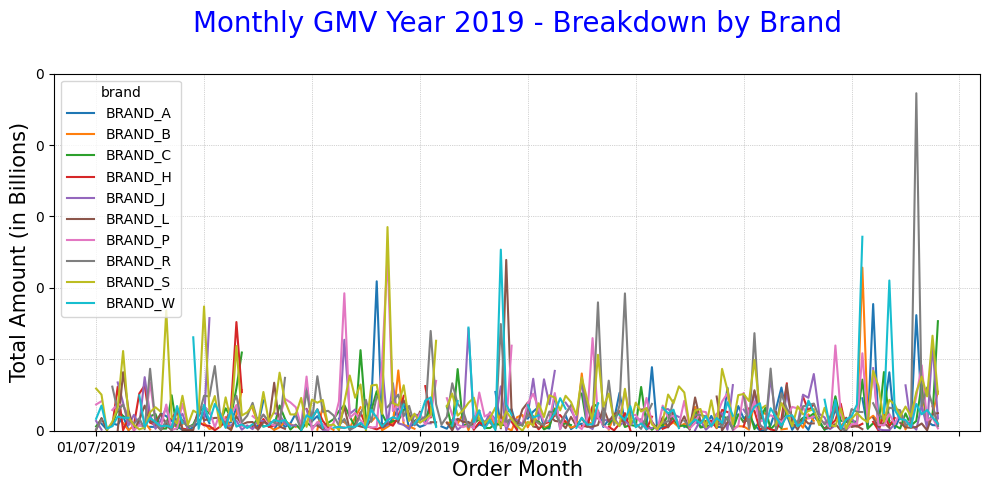

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt


dataset = pd.read_csv('retail_raw_reduced_data_quality.csv')

dataset['order_month'] = pd.to_datetime(dataset['order_date'], format='%d/%m/%Y').dt.strftime('%Y-%m')

# Create a new column for GMV
dataset['gmv'] = dataset['item_price'] * dataset['quantity']

# Create a multi-line chart
dataset.groupby(['order_date', 'brand'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019 - Breakdown by Brand', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels / 1000000000).astype(int))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()


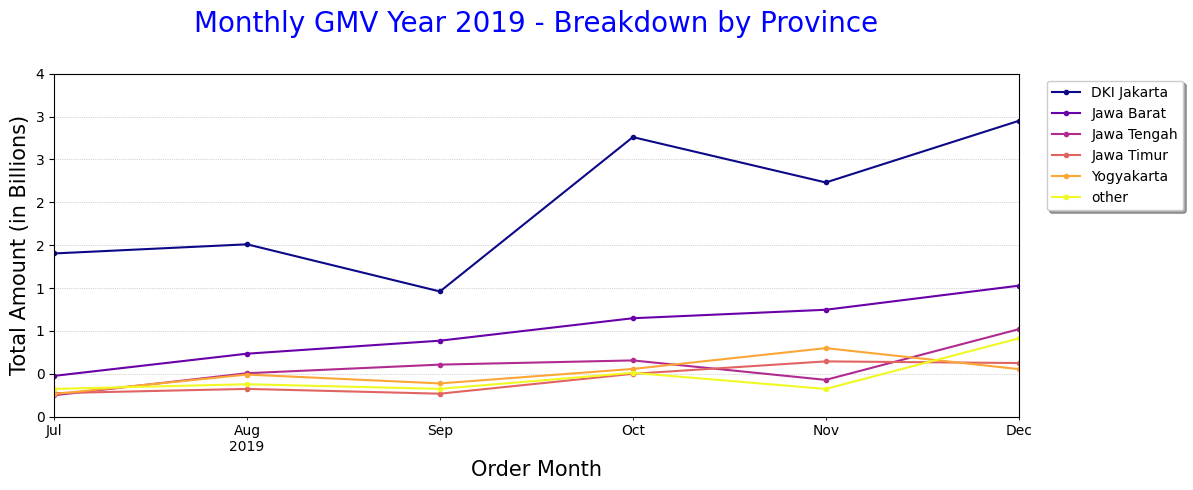

      province           gmv
2  DKI Jakarta  1.481625e+10
3   Jawa Barat  6.022199e+09
4  Jawa Tengah  3.472106e+09
6   Yogyakarta  3.057931e+09
5   Jawa Timur  2.640012e+09


In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('retail_raw_reduced_data_quality.csv')

# Parse the 'order_date' column
dataset['order_date'] = pd.to_datetime(dataset['order_date'], format='%d/%m/%Y')

# Create a new column for GMV
dataset['gmv'] = dataset['item_price'] * dataset['quantity']

# Extract the order month
dataset['order_month'] = dataset['order_date'].dt.to_period('M')

# Find the top 5 provinces by GMV
top_provinces = (dataset.groupby('province')['gmv']
                 .sum()
                 .reset_index()
                 .sort_values(by='gmv', ascending=False)
                 .head(5))

# Create a new column to categorize provinces into top provinces and others
dataset['province_top'] = dataset['province'].apply(lambda x: x if x in top_provinces['province'].to_list() else 'other')

# Plot the multi-line chart
dataset.groupby(['order_month', 'province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels / 1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

print(top_provinces)


In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('retail_raw_reduced_data_quality.csv')

dataset_dki_q4 = dataset[(dataset['province'] == 'DKI Jakarta') & (dataset['order_date'] >= '2019-10')]
print(dataset_dki_q4.head())

    order_id  order_date  customer_id             city     province  \
1    1706815  24/10/2019        17220  Jakarta Selatan  DKI Jakarta   
8    1741846  30/12/2019        16873    Jakarta Barat  DKI Jakarta   
13   1705093  21/10/2019        16999    Jakarta Utara  DKI Jakarta   
29   1719550  22/11/2019        15028  Jakarta Selatan  DKI Jakarta   
30   1675705  25/07/2019        16316    Jakarta Timur  DKI Jakarta   

   product_id    brand  quantity  item_price  
1       P2934  BRAND_R       2.0    604000.0  
8       P3203  BRAND_S      32.0    450000.0  
13      P2521  BRAND_P       4.0   1745000.0  
29      P3194  BRAND_S      18.0   1150000.0  
30      P2560  BRAND_P      36.0     79000.0  


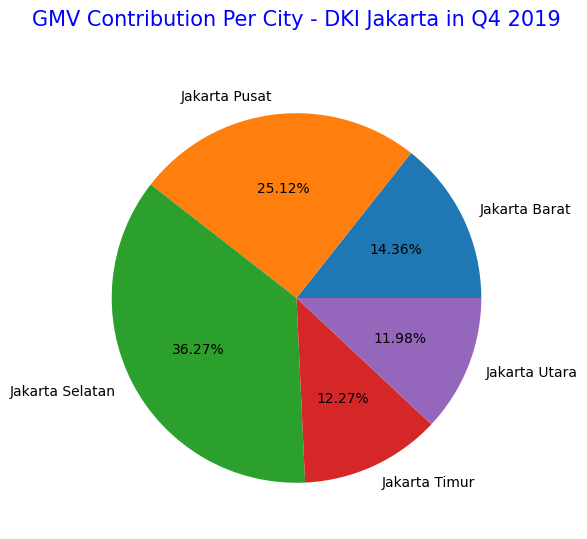

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('retail_raw_reduced_data_quality.csv')

# Parse the 'order_date' column
dataset['order_date'] = pd.to_datetime(dataset['order_date'], format='%d/%m/%Y')

# Create a new column for GMV
dataset['gmv'] = dataset['item_price'] * dataset['quantity']

# Filter the dataset for DKI Jakarta and Q4 2019
dataset_dki_q4 = dataset[(dataset['province'] == 'DKI Jakarta') &
                         (dataset['order_date'].dt.quarter == 4) &
                         (dataset['order_date'].dt.year == 2019)]

# Group by city and sum the GMV
gmv_per_city_dki_q4 = dataset_dki_q4.groupby('city')['gmv'].sum().reset_index()

# Plot the pie chart
plt.figure(figsize=(6,6))
plt.pie(gmv_per_city_dki_q4['gmv'], labels=gmv_per_city_dki_q4['city'], autopct='%1.2f%%')
plt.title('GMV Contribution Per City - DKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.show()


<ipython-input-10-9b079de9a6ec>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='city', y='gmv', data=gmv_per_city_dki_q4, palette=palette)
<ipython-input-10-9b079de9a6ec>:26: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(x='city', y='gmv', data=gmv_per_city_dki_q4, palette=palette)


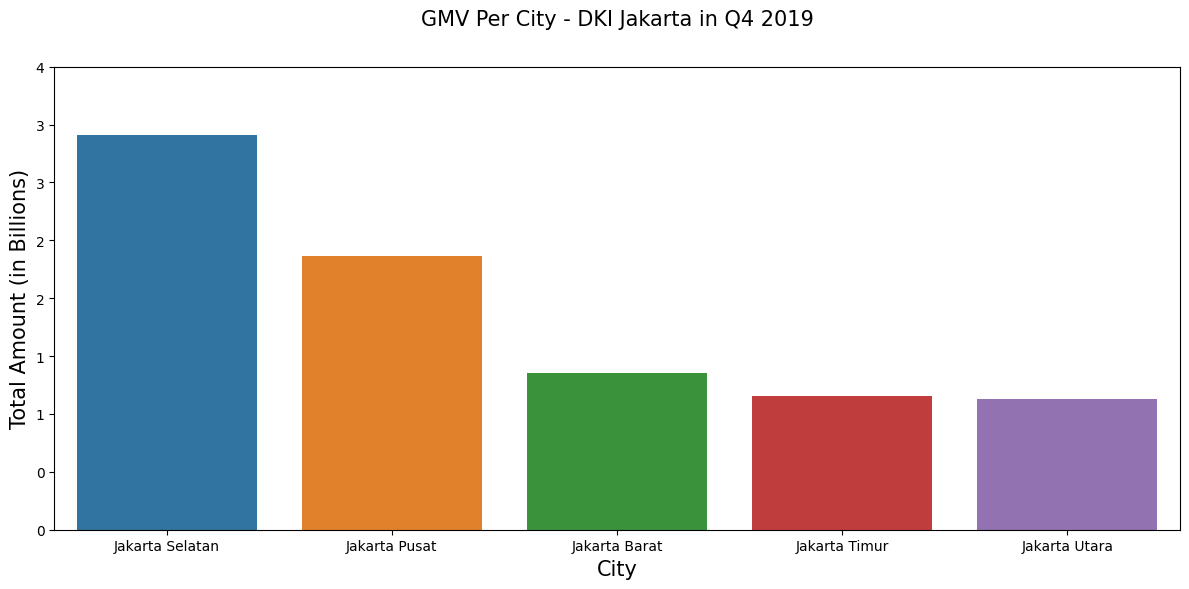

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset = pd.read_csv('retail_raw_reduced_data_quality.csv')

# Parse the 'order_date' column
dataset['order_date'] = pd.to_datetime(dataset['order_date'], format='%d/%m/%Y')

# Create a new column for GMV
dataset['gmv'] = dataset['item_price'] * dataset['quantity']

# Filter the dataset for DKI Jakarta and Q4 2019
dataset_dki_q4 = dataset[(dataset['province'] == 'DKI Jakarta') &
                         (dataset['order_date'].dt.quarter == 4) &
                         (dataset['order_date'].dt.year == 2019)]

# Group by city and sum the GMV
gmv_per_city_dki_q4 = dataset_dki_q4.groupby('city')['gmv'].sum().sort_values(ascending=False).reset_index()

# Plot the bar chart using seaborn
plt.figure(figsize=(12, 6))
palette = sns.color_palette("tab10")
sns.barplot(x='city', y='gmv', data=gmv_per_city_dki_q4, palette=palette)
plt.title('GMV Per City - DKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='black')
plt.xlabel('City', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.ylim(ymin=0)

# Adjust y-ticks to show values in billions
labels, locations = plt.yticks()
plt.yticks(labels, (labels / 1000000000).astype(int))

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

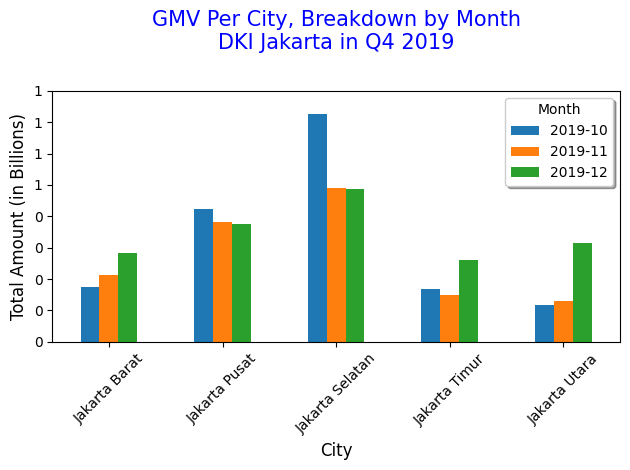

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('retail_raw_reduced_data_quality.csv')

# Parse the 'order_date' column
dataset['order_date'] = pd.to_datetime(dataset['order_date'], format='%d/%m/%Y')

# Create a new column for GMV
dataset['gmv'] = dataset['item_price'] * dataset['quantity']

# Create a new column for order month
dataset['order_month'] = dataset['order_date'].dt.to_period('M')

# Filter the dataset for DKI Jakarta and Q4 2019
dataset_dki_q4 = dataset[(dataset['province'] == 'DKI Jakarta') &
                         (dataset['order_date'].dt.quarter == 4) &
                         (dataset['order_date'].dt.year == 2019)]

# Group by city and order month, and sum the GMV
gmv_per_city_month_dki_q4 = dataset_dki_q4.groupby(['city', 'order_month'])['gmv'].sum().unstack()

# Plot the bar chart
plt.clf()
gmv_per_city_month_dki_q4.plot(kind='bar')
plt.title('GMV Per City, Breakdown by Month\nDKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Amount (in Billions)', fontsize=12)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, title='Month')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels / 1000000000).astype(int))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

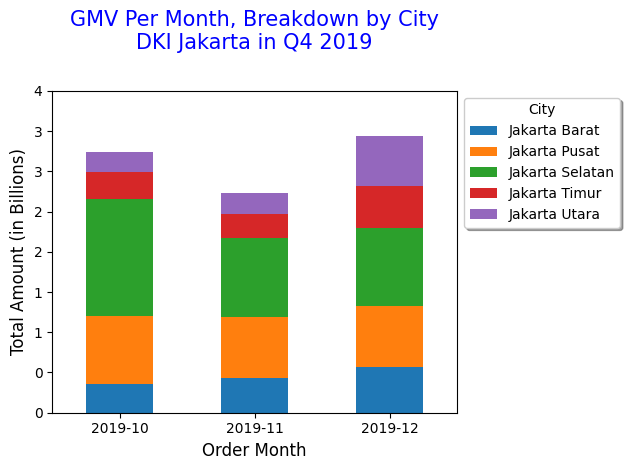

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('retail_raw_reduced_data_quality.csv')

# Parse the 'order_date' column
dataset['order_date'] = pd.to_datetime(dataset['order_date'], format='%d/%m/%Y')

# Create a new column for GMV
dataset['gmv'] = dataset['item_price'] * dataset['quantity']

# Create a new column for order month
dataset['order_month'] = dataset['order_date'].dt.to_period('M')

# Filter the dataset for DKI Jakarta and Q4 2019
dataset_dki_q4 = dataset[(dataset['province'] == 'DKI Jakarta') &
                         (dataset['order_date'].dt.quarter == 4) &
                         (dataset['order_date'].dt.year == 2019)]

# Group by order month and city, and sum the GMV
gmv_per_month_city_dki_q4 = dataset_dki_q4.groupby(['order_month', 'city'])['gmv'].sum().unstack()

# Plot the stacked bar chart
plt.clf()
gmv_per_month_city_dki_q4.plot(kind='bar', stacked=True)
plt.title('GMV Per Month, Breakdown by City\nDKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Order Month', fontsize=12)
plt.ylabel('Total Amount (in Billions)', fontsize=12)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, ncol=1, title='City')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels / 1000000000).astype(int))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('retail_raw_reduced_data_quality.csv')
data_per_customer = (dataset_dki_q4.groupby('customer_id')
.agg({'order_id': 'nunique',
'quantity': 'sum',
'gmv' : 'sum' })
.reset_index()
.rename(columns={'order_id' : 'orders'}))
print(data_per_customer. sort_values(by='orders', ascending=False))

     customer_id  orders  quantity          gmv
0          12748      29     557.0  175286000.0
662        17841      26     269.0  143884000.0
207        14606      13      25.0   20714000.0
25         13089       8     166.0   93554000.0
462        16549       8      29.0   22714000.0
..           ...     ...       ...          ...
294        15154       1       4.0    2689000.0
291        15148       1      12.0    5400000.0
289        15121       1       8.0    2424000.0
288        15117       1       1.0    3494000.0
384        15975       1      42.0   25410000.0

[711 rows x 4 columns]


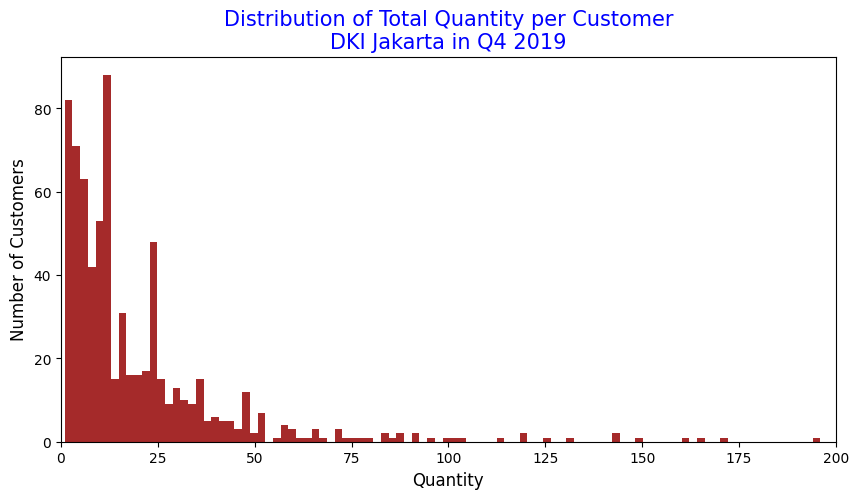

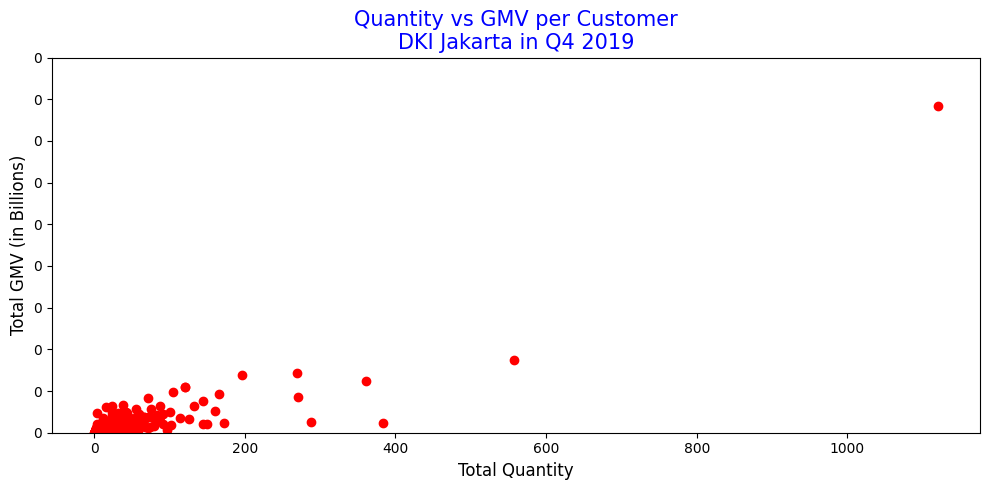

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('retail_raw_reduced_data_quality.csv')

# Parse the 'order_date' column
dataset['order_date'] = pd.to_datetime(dataset['order_date'], format='%d/%m/%Y')

# Create a new column for GMV
dataset['gmv'] = dataset['item_price'] * dataset['quantity']

# Filter the dataset for DKI Jakarta and Q4 2019
dataset_dki_q4 = dataset[(dataset['province'] == 'DKI Jakarta') &
                         (dataset['order_date'].dt.quarter == 4) &
                         (dataset['order_date'].dt.year == 2019)]

# Group by customer ID and aggregate the data
data_per_customer = (dataset_dki_q4.groupby('customer_id')
    .agg({'order_id': 'nunique', 'quantity': 'sum', 'gmv': 'sum'})
    .reset_index()
    .rename(columns={'order_id': 'orders'}))

# Plot the histogram
plt.figure(figsize=(10,5))
plt.hist(data_per_customer['quantity'], bins=100, range=(1,200), color='brown')
plt.title('Distribution of Total Quantity per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlim(xmin=0, xmax=200)

# Plot the scatter plot
plt.figure(figsize=(10,5))
plt.scatter(data_per_customer['quantity'], data_per_customer['gmv'], color='red')
plt.title('Quantity vs GMV per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Total Quantity', fontsize=12)
plt.ylabel('Total GMV (in Billions)', fontsize=12)
plt.ylim(ymin=0)
plt.tight_layout()

# Adjust y-axis for GMV in billions
labels, locations = plt.yticks()
plt.yticks(labels, (labels / 1000000000).astype(int))

plt.show()
